In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load datasets
df=pd.read_csv('Simulator_readings.csv')
df

,Time(ms),Fhr1(BPM),Fhr2(BPM),Uc(TOCO)
0,250,126,0,9
1,500,126,0,9
2,750,126,0,10
3,1000,126,0,10
4,1250,126,0,10
...,...,...,...,...
2395,599000,130,0,11
2396,599250,130,0,11
2397,599500,130,0,11
2398,599750,129,0,11


In [4]:
df['Fhr2(BPM)'].value_counts()

Fhr2(BPM)
0    2400
Name: count, dtype: int64

In [5]:
df.drop(columns=['Fhr2(BPM)'], inplace=True)

In [6]:
df

,Time(ms),Fhr1(BPM),Uc(TOCO)
0,250,126,9
1,500,126,9
2,750,126,10
3,1000,126,10
4,1250,126,10
...,...,...,...
2395,599000,130,11
2396,599250,130,11
2397,599500,130,11
2398,599750,129,11


In [7]:
# Convert time from ms to s
df['time'] = df['Time(ms)'] / 1000

In [8]:
df.drop(columns=['Time(ms)'], inplace=True)

## Task:-

### 1.Plotting graphs:

Text(0, 0.5, 'FHR1 (BPM)')

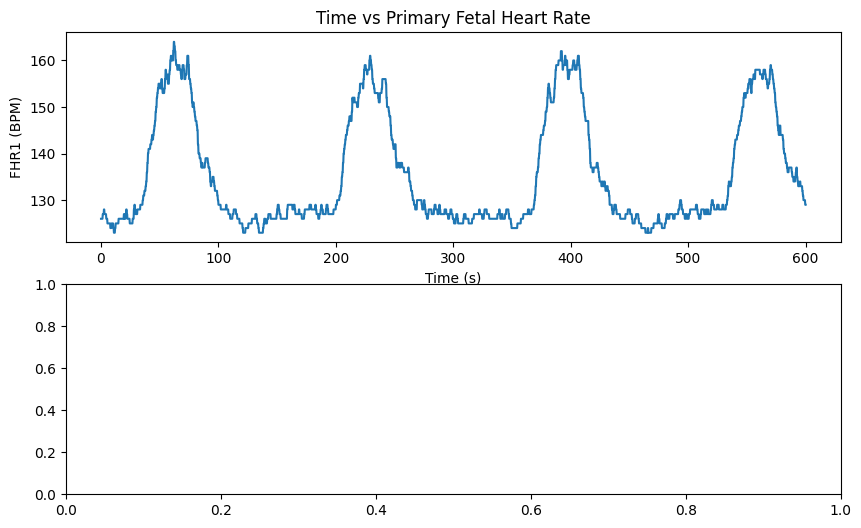

In [9]:
# Plot Time vs Fhr1 
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(df['time'], df['Fhr1(BPM)'])
ax[0].set_title('Time vs Primary Fetal Heart Rate')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('FHR1 (BPM)')


Text(0, 0.5, 'UC (TOCO)')

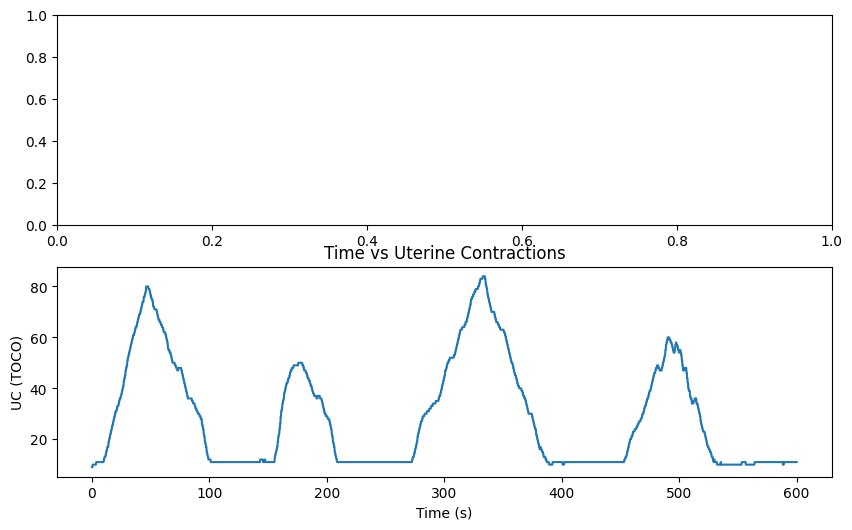

In [10]:
#Time vs Uc graphs
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[1].plot(df['time'], df['Uc(TOCO)'])
ax[1].set_title('Time vs Uterine Contractions')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('UC (TOCO)')


In [11]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

## Task 2

### FHR Analysis

In [12]:
#Divide each minute of the NST reading into sixteen 3.750-second epochs
epoch_duration = 3.75  # seconds
df['Epoch'] = np.floor(df['time'] / epoch_duration)


In [13]:
#calculate the average FHR in 
#Beats per minute(bpm).
fhr1_epochs = df.groupby('Epoch')['Fhr1(BPM)'].mean()
#Pulse interval(milliseconds)
fhr1_pulse_intervals = 60 / fhr1_epochs  # Convert BPM to pulse interval (ms)

## Task 3

### UC Peak Detection

In [14]:
# UC Peak Detection
uc_peaks, _ = find_peaks(df['Uc(TOCO)'], height=0.5)  # Adjust height for peak detection sensitivity


In [15]:
uc_peaks, _

(array([ 187,  298,  576,  588,  708,  771, 1333, 1526, 1584, 1925, 1962,
        1988, 2001, 2020, 2054, 2118, 2140, 2218, 2303], dtype=int64),
 {'peak_heights': array([80., 48., 12., 12., 50., 37., 84., 17., 11., 49., 60., 58., 55.,
         48., 36., 12., 11., 11., 11.])})

### finding the width of the peak at half its maximum height

In [16]:
peak_widths = []
for peak_idx in uc_peaks:
    peak_time = df['time'].iloc[peak_idx]
    peak_height = df['Uc(TOCO)'].iloc[peak_idx]
    half_max_height = peak_height / 2
    
    # Find left index
    left_values = df['Uc(TOCO)'][peak_idx::-1]
    left_idx_search = np.searchsorted(left_values, half_max_height)
    left_idx = peak_idx - left_idx_search
    
    # Find right index
    right_values = df['Uc(TOCO)'][peak_idx:]
    right_idx_search = np.searchsorted(right_values, half_max_height)
    right_idx = peak_idx + right_idx_search
    
    # Ensure right_idx is not out of bounds
    right_idx = min(right_idx, len(df['time']) - 1)
    
    peak_width = df['time'].iloc[right_idx] - df['time'].iloc[left_idx]
    peak_widths.append(peak_width)






In [17]:
print("peak_idx:", peak_idx)
print("left_idx:", left_idx)
print("right_idx:", right_idx)
print("DataFrame length:", len(df))


peak_idx: 2303
left_idx: 2303
right_idx: 2303
DataFrame length: 2400


In [18]:
# Check for invalid indices
if peak_idx - left_idx < 0 or right_idx >= len(df):
    print("Index out of bounds")
else:
    # Calculate peak width if indices are valid
    peak_width = df['time'].iloc[right_idx] - df['time'].iloc[peak_idx - left_idx]
    peak_widths.append(peak_width)

In [19]:
# Clamp indices to prevent out-of-bounds errors
left_idx = max(0, peak_idx - left_idx)
right_idx = min(len(df) - 1, right_idx + peak_idx)


### Count peaks where the width > 30 sec

In [20]:
long_peaks = [width for width in peak_widths if width > 30]
avg_long_peak_duration = np.mean(long_peaks)


In [21]:
#Calculate and report the average duration of the counted UC peaks
print(f'Average duration of UC peaks > 30 seconds: {avg_long_peak_duration:.2f} seconds')


Average duration of UC peaks > 30 seconds: 450.93 seconds


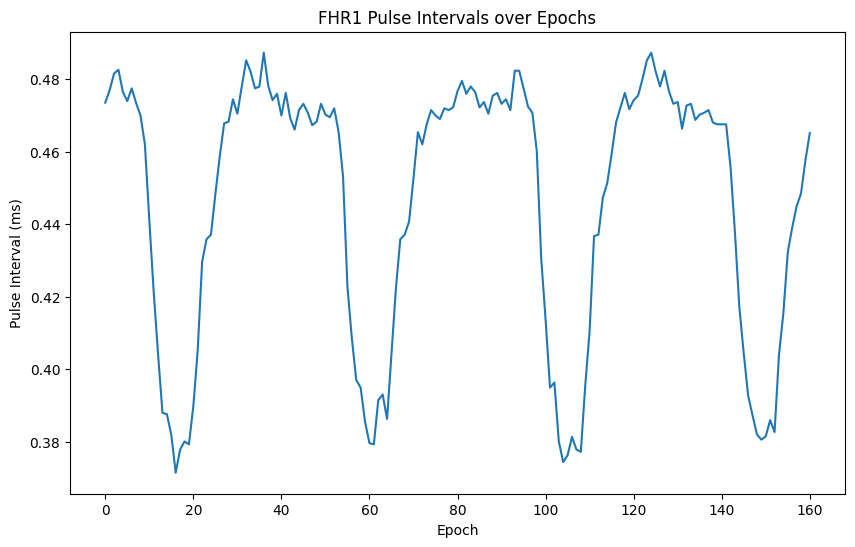

In [22]:
# Plot FHR1 pulse intervals over epochs
plt.figure(figsize=(10, 6))
plt.plot(fhr1_pulse_intervals)
plt.title('FHR1 Pulse Intervals over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Pulse Interval (ms)')
plt.show()



